In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd gdrive/My\ Drive/Vanderbilt/5th\ Semester\ 2020-2021/DS-5660/DL_course_hw/Homework\ 5/

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5


In [3]:
!ls

apex		   cocoapi	       maskrcnn-benchmark.ipynb
cityscapesScripts  maskrcnn-benchmark  __pycache__


In [ ]:
!pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install ninja yacs cython matplotlib tqdm opencv-python

In [ ]:
%cd cocoapi/PythonAPI
! python setup.py build_ext install

In [ ]:
%cd ../../cityscapesScripts/
! python setup.py build_ext install

In [ ]:
%cd ../apex/
! python setup.py install --cuda_ext --cpp_ext

In [7]:
%cd ../maskrcnn-benchmark/
! python setup.py build develop

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark
running build
running build_py
running build_ext
running develop
running egg_info
writing maskrcnn_benchmark.egg-info/PKG-INFO
writing dependency_links to maskrcnn_benchmark.egg-info/dependency_links.txt
writing top-level names to maskrcnn_benchmark.egg-info/top_level.txt
writing manifest file 'maskrcnn_benchmark.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.6/maskrcnn_benchmark/_C.cpython-36m-x86_64-linux-gnu.so -> maskrcnn_benchmark
Creating /usr/local/lib/python3.6/dist-packages/maskrcnn-benchmark.egg-link (link to .)
Adding maskrcnn-benchmark 0.1 to easy-install.pth file

Installed /content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark
Processing dependencies for maskrcnn-benchmark==0.1
Finished processing dependencies for maskrcnn-benchmark==0.1


In [11]:
%cd apex/

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/apex


In [12]:
%cd ../maskrcnn-benchmark/maskrcnn_benchmark/
! ls

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark/maskrcnn_benchmark
_C.cpython-36m-x86_64-linux-gnu.so  data	 layers       solver
config				    engine	 modeling     structures
csrc				    __init__.py  __pycache__  utils


In [9]:
%cd ../maskrcnn_benchmark/maskrcnn_benchmark
!rm -r build
%cd ../
!python setup.py develop

[Errno 2] No such file or directory: '../maskrcnn_benchmark/maskrcnn_benchmark'
/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/apex
rm: cannot remove 'build': No such file or directory
/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
!pip install gpustat

In [9]:
!gpustat

746d8b6b3844             Sun Aug  9 23:29:20 2020  418.67
[0] Tesla P100-PCIE-16GB | 34'C,   0 % |     0 / 16280 MB |


Below is the demo for using `maskrcnn-benchmark` for object detection. Before proceeding, you need to restart the runtime to load all modules just installed.   

# Model 1: Mask_R-CNN 

In [8]:
%cd maskrcnn-benchmark/

[Errno 2] No such file or directory: 'maskrcnn-benchmark/'
/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [ ]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 16, 9

In [5]:
from maskrcnn_benchmark.config import cfg

In [ ]:
config_file = "configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

In [ ]:
%run demo/predictor.py

In [ ]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

Downloading: "https://dl.fbaipublicfiles.com/detectron/35858933/12_2017_baselines/e2e_mask_rcnn_R-50-FPN_1x.yaml.01_48_14.DzEQe4wC/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl" to /root/.torch/models/_detectron_35858933_12_2017_baselines_e2e_mask_rcnn_R-50-FPN_1x.yaml.01_48_14.DzEQe4wC_output_train_coco_2014_train%3Acoco_2014_valminusminival_generalized_rcnn_model_final.pkl
/usr/local/lib/python3.6/dist-packages/torch/hub.py:424: UserWarning: torch.hub._download_url_to_file has been renamed to            torch.hub.download_url_to_file to be a public API,            _download_url_to_file will be removed in after 1.3 release
  _download_url_to_file will be removed in after 1.3 release')


In [ ]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

## Picture 1

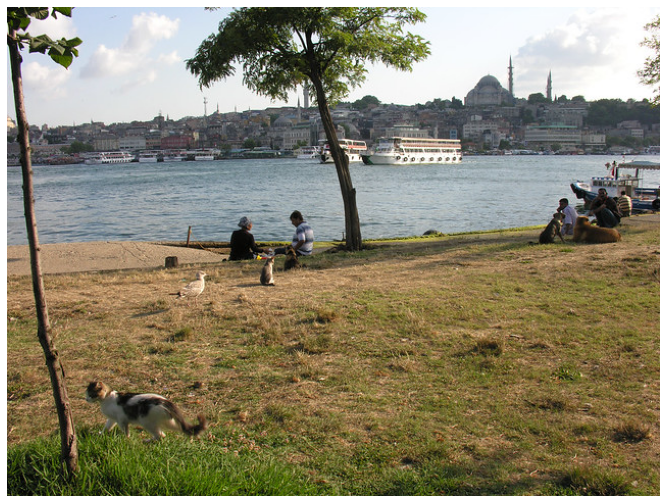

In [ ]:
image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg")
imshow(image)

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark/maskrcnn_benchmark/structures/boxlist_ops.py:46: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  (ws >= min_size) & (hs >= min_size)


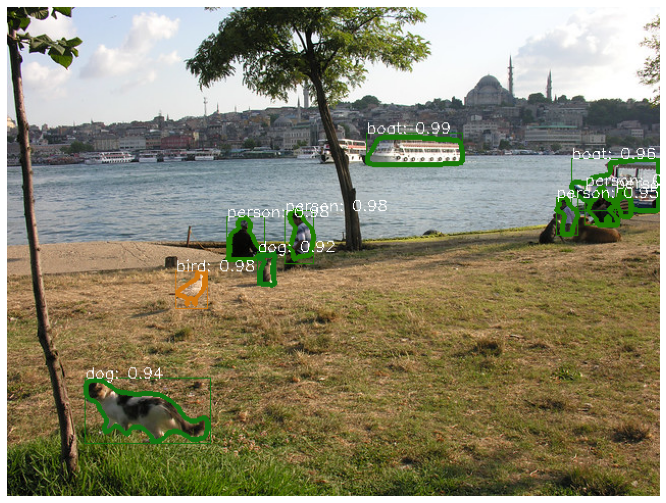

In [ ]:
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

## Picture 2

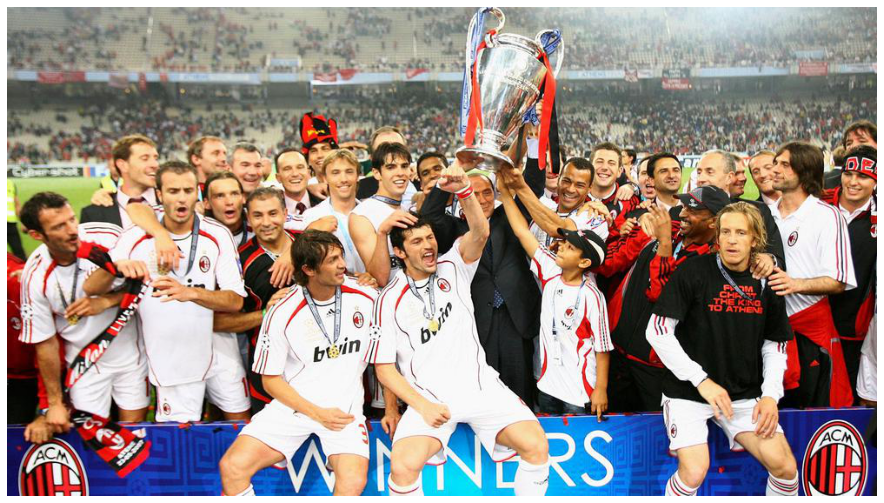

In [ ]:
image = load("https://images.beinsports.com/aEiSCIqs6ypBRfOnJgrvtBhxrtM=/full-fit-in/1000x0/3236910-team_win.jpg")
imshow(image)

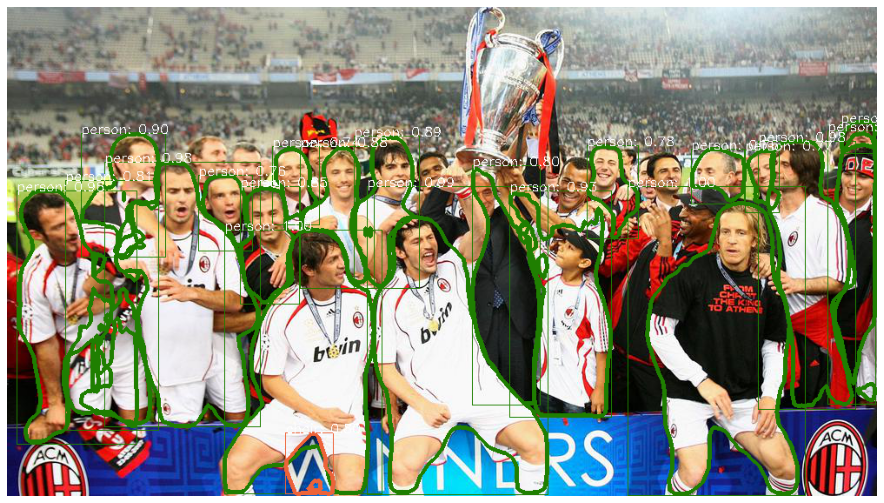

In [ ]:
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

# Model 2: Model trained on COCO dataset

Create link

In [ ]:
!pwd

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark


In [ ]:
!mkdir -p datasets/coco

Put downloaded COCO datasets under `datasets/coco`

Training 


In [2]:
%cd maskrcnn-benchmark/

/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark


In [10]:
from torch import cuda
cuda.is_available()

True

In [4]:
import torch
torch.__version__

'1.4.0'

In [3]:
!python tools/train_net.py --config-file "configs/e2e_mask_rcnn_R_50_FPN_1x.yaml"

Traceback (most recent call last):
  File "tools/train_net.py", line 15, in <module>
    from maskrcnn_benchmark.data import make_data_loader
  File "/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark/maskrcnn_benchmark/data/__init__.py", line 2, in <module>
    from .build import make_data_loader
  File "/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark/maskrcnn_benchmark/data/build.py", line 11, in <module>
    from . import datasets as D
  File "/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark/maskrcnn_benchmark/data/datasets/__init__.py", line 3, in <module>
    from .coco import COCODataset
  File "/content/gdrive/My Drive/Vanderbilt/5th Semester 2020-2021/DS-5660/DL_course_hw/Homework 5/maskrcnn-benchmark/maskrcnn_benchmark/data/datasets/coco.py", line 6, in <module>
    from maskrcnn_benchmark.structur

In [ ]:
! pip freeze
# torchvision==0.7.0+cu101

In [ ]:
!nvidia-smi

Sun Aug  9 01:13:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! /usr/local/cuda/bin/nvcc --version
! gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Evaluation

In [ ]:
torch.tensor([1.0, 2.0]).cuda()

tensor([1., 2.], device='cuda:0')